# Описание проекта
Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
без подписки

1. абонентская плата отсутствует: 
<p> стоимость одной минуты поездки — 8 рублей;
<p> стоимость старта (начала поездки) — 50 рублей;
<p>
2. с подпиской Ultra: 
<p> абонентская плата — 199 рублей в месяц;
<p> стоимость одной минуты поездки — 6 рублей;
<p> стоимость старта — бесплатно.

**Пользователи — users_go.csv**
<p> 
user_id — уникальный идентификатор пользователя
<p> 
name — имя пользователя
<p> 
age	— возраст
<p> 
city — город
<p> 
subscription_type - тип подписки (free, ultra)

**Поездки — rides_go.csv**
<p>user_id	— уникальный идентификатор пользователя
<p>distance — расстояние, которое пользователь проехал в текущей сессии (в метрах)
<p>duration — продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
<p>date — дата совершения поездки

**Подписки — subscriptions_go.csv**
<p>subscription_type — тип подписки
<p>minute_price — стоимость одной минуты поездки по данной подписке
<p>start_ride_price — стоимость начала поездки
<p>subscription_fee — стоимость ежемесячного платежа

**Цель исследования:** Анализ данных о пользователях и их поездках в сервисе аренды самокатов GoFast с целью выявления закономерностей и проверки гипотез, которые могут помочь бизнесу увеличить доходы.

**Ход исследования:**

**1. Импортирование данных:**
Загрузка данных о пользователях, поездках и подписках в соответствующие датафреймы.

**2. Предварительный анализ данных:**
Проверка размерности данных, типов данных и наличия пропущенных значений.

**3. Исследование:**

1. Анализ частоты встречаемости городов.
2. Визуализация информации о городах для получения общего представления.
3. Исследование подписок: Определение соотношения пользователей с подпиской и без подписки. Анализ и сравнение данных пользователей с разными типами подписок.
4. Анализ возраста пользователей: Определение распределения возрастов пользователей.

**4. Анализ пользователей:** 
1. Анализ расстояния: Оценка распределения преодоленных расстояний пользователями. Сравнение расстояний для разных типов подписок.
2. Анализ продолжительности поездок: Изучение распределения продолжительности поездок. Сравнение продолжительности поездок для разных типов подписок.

**5. Анализ поездок:**
 Расчет и анализ выручки: Объединение данных о пользователях, поездках и подписках в один датафрейм. Расчет помесячной выручки, принесенной каждым пользователем, с учетом условий оплаты для подписчиков и без подписки.

**6. Проверка гипотез**

# Шаг 1. Загрузка данных

In [1]:
#Загружаем библиотеки.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
#Записымываем CSV-файлы в датафреймы и выводим информацию о каждом датасете.
users_df = pd.read_csv('/datasets/users_go.csv')
rides_df = pd.read_csv('/datasets/rides_go.csv')
subscriptions_df = pd.read_csv('/datasets/subscriptions_go.csv')

In [3]:
print('Первый пять строк из CSV-файла users_go:')
print(users_df.head())
print('\nИнформация о CSV-файле users_go:')
print(users_df.info())

Первый пять строк из CSV-файла users_go:

   user_id        name  age            city subscription_type

0        1        Кира   22          Тюмень             ultra

1        2   Станислав   31            Омск             ultra

2        3     Алексей   20          Москва             ultra

3        4  Константин   26  Ростов-на-Дону             ultra

4        5       Адель   28            Омск             ultra



Информация о CSV-файле users_go:

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 1565 entries, 0 to 1564

Data columns (total 5 columns):

 #   Column             Non-Null Count  Dtype 

---  ------             --------------  ----- 

 0   user_id            1565 non-null   int64 

 1   name               1565 non-null   object

 2   age                1565 non-null   int64 

 3   city               1565 non-null   object

 4   subscription_type  1565 non-null   object

dtypes: int64(2), object(3)

memory usage: 61.3+ KB

None


In [4]:
print('\nПервый пять строк из CSV-файла rides_go:')
print(rides_df.head())
print('\nИнформация о CSV-файле rides_go:')
print(rides_df.info())



Первый пять строк из CSV-файла rides_go:

   user_id     distance   duration        date

0        1  4409.919140  25.599769  2021-01-01

1        1  2617.592153  15.816871  2021-01-18

2        1   754.159807   6.232113  2021-04-20

3        1  2694.783254  18.511000  2021-08-11

4        1  4028.687306  26.265803  2021-08-28



Информация о CSV-файле rides_go:

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 18068 entries, 0 to 18067

Data columns (total 4 columns):

 #   Column    Non-Null Count  Dtype  

---  ------    --------------  -----  

 0   user_id   18068 non-null  int64  

 1   distance  18068 non-null  float64

 2   duration  18068 non-null  float64

 3   date      18068 non-null  object 

dtypes: float64(2), int64(1), object(1)

memory usage: 564.8+ KB

None


In [5]:
print('\nПервый пять строк из CSV-файла subscriptions_go:')
print(subscriptions_df.head())
print('\nИнформация о CSV-файле subscriptions_go:')
print(subscriptions_df.info())



Первый пять строк из CSV-файла subscriptions_go:

  subscription_type  minute_price  start_ride_price  subscription_fee

0              free             8                50                 0

1             ultra             6                 0               199



Информация о CSV-файле subscriptions_go:

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 2 entries, 0 to 1

Data columns (total 4 columns):

 #   Column             Non-Null Count  Dtype 

---  ------             --------------  ----- 

 0   subscription_type  2 non-null      object

 1   minute_price       2 non-null      int64 

 2   start_ride_price   2 non-null      int64 

 3   subscription_fee   2 non-null      int64 

dtypes: int64(3), object(1)

memory usage: 192.0+ bytes

None


**1. Таблица users_go:**
<p> Cостоит из 1565 строк.

**2. Таблица rides_go:**
<p> Cостоит из 18068 строк.
<p>   Столбцу date нужно изменить тип данных

**3. Таблица subscriptions_go:**
<p> Cостоит из 2 строк.

# Шаг 2. Предобработка данных

1. Приведем столбец date к типу даты pandas.

In [6]:
#Преобразовываем тип данных object в столбце date в формат данных date.
rides_df['date'] = pd.to_datetime(rides_df['date'])
#Проверим
rides_df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 18068 entries, 0 to 18067

Data columns (total 4 columns):

 #   Column    Non-Null Count  Dtype         

---  ------    --------------  -----         

 0   user_id   18068 non-null  int64         

 1   distance  18068 non-null  float64       

 2   duration  18068 non-null  float64       

 3   date      18068 non-null  datetime64[ns]

dtypes: datetime64[ns](1), float64(2), int64(1)

memory usage: 564.8 KB


2. Создаем новый столбец с номером месяца на основе столбца date.

In [7]:
#Создаем новый столбец с номером месяца.
rides_df['month'] = rides_df['date'].dt.month
#Проверим
rides_df.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [8]:
print('Период данных от', rides_df['date'].min(), 'до', rides_df['date'].max())

Период данных от 2021-01-01 00:00:00 до 2021-12-30 00:00:00


3. Проверяем на наличие пропущенных значенийв датафреймах.

In [9]:
#Проверяем количество пропущенных значений в users_df.
print('Количество пропущенных значений в users_go:\n', users_df.isna().sum())
#Проверяем количество пропущенных значений в rides_df.
print('Количество пропущенных значений в rides_go:\n', rides_df.isna().sum())
#Проверяем количество пропущенных значений в subscriptions_go.
print('Количество пропущенных значений в subscriptions_go:\n', subscriptions_df.isna().sum())

Количество пропущенных значений в users_go:

 user_id              0

name                 0

age                  0

city                 0

subscription_type    0

dtype: int64

Количество пропущенных значений в rides_go:

 user_id     0

distance    0

duration    0

date        0

month       0

dtype: int64

Количество пропущенных значений в subscriptions_go:

 subscription_type    0

minute_price         0

start_ride_price     0

subscription_fee     0

dtype: int64


In [10]:
print('Дубликатов в users_df:', users_df.duplicated().sum())
print('Дубликатов в rides_df:', rides_df.duplicated().sum())
print('Дубликатов в subscriptions_df:', subscriptions_df.duplicated().sum())

Дубликатов в users_df: 31

Дубликатов в rides_df: 0

Дубликатов в subscriptions_df: 0


Удаляем дубликаты в датафрейме.

In [11]:
#Удаляем дубликаты для users_df.
users_df = users_df.drop_duplicates()

In [12]:
#Проверка
print('Дубликатов в users_df:', users_df.duplicated().sum())

Дубликатов в users_df: 0


1. Поменял тип данных у столбца date.
2. Создали новый столбец с номером месяца.
3. Проверили и удалили дубликаты во всех датафреймах.

# Шаг 3. Исследовательский анализ данных

In [13]:
#Описание общей информации о пользователях.
print("Общая информация о пользователях:")
print(users_df.describe())

Общая информация о пользователях:

           user_id          age

count  1534.000000  1534.000000

mean    767.500000    24.903520

std     442.971971     4.572367

min       1.000000    12.000000

25%     384.250000    22.000000

50%     767.500000    25.000000

75%    1150.750000    28.000000

max    1534.000000    43.000000


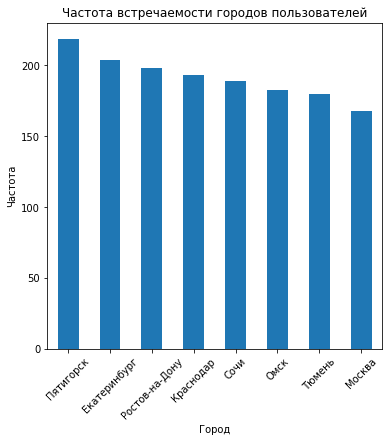

In [14]:
#Частота встречаемости городов пользователей.
city_counts = users_df['city'].value_counts().sort_values(ascending=False)

#Визуализация частоты встречаемости городов пользователей.
city_counts.plot(rot=45, kind='bar', title='Частота встречаемости городов пользователей', figsize=(6, 6))
plt.xlabel('Город')
plt.ylabel('Частота')
plt.show()

Больше всего пользователей из Пятигорска, а наименьшей частотой встречаемости городов пользователей обладает Москва.

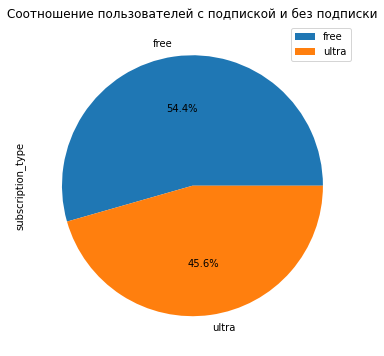

In [15]:
#Соотношение пользователей с подпиской и без подписки.
subscription_counts = users_df['subscription_type'].value_counts()

#Визуализация частоты встречаемости городов пользователей.
subscription_counts.plot(kind='pie', autopct='%1.1f%%', title='Соотношение пользователей с подпиской и без подписки', figsize=(6, 6))
plt.legend()
plt.show()

Без подписки 54.4% пользователей, а с подпиской "ultra" 45.6%.

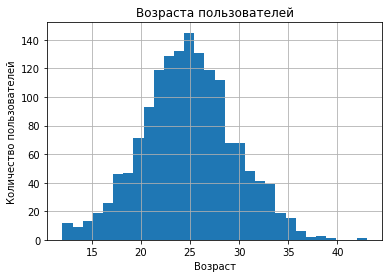

In [16]:
#Возраст пользователей.
users_df['age'].plot(kind='hist', bins=30, grid=True, title='Возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.show()

In [17]:
#Описание общей информации о поездках.
print('Общая информации о поездках:\n', rides_df.describe())

Общая информации о поездках:

             user_id      distance      duration         month

count  18068.000000  18068.000000  18068.000000  18068.000000

mean     842.869936   3070.659976     17.805011      6.486772

std      434.734317   1116.831209      6.091051      3.437410

min        1.000000      0.855683      0.500000      1.000000

25%      487.000000   2543.226360     13.597563      4.000000

50%      889.000000   3133.609994     17.678395      6.000000

75%     1213.250000   3776.222735     21.724800      9.000000

max     1534.000000   7211.007745     40.823963     12.000000


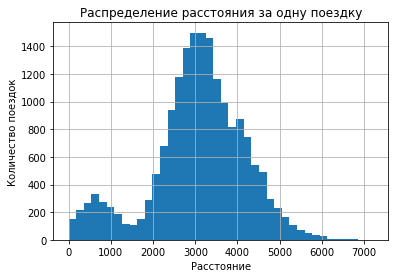

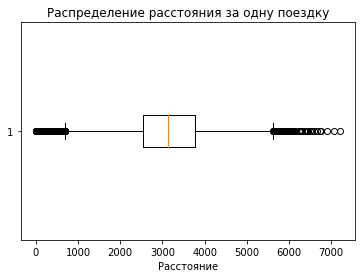

In [18]:
#Расстояние, которое пользователь преодолел за одну поездку.
rides_df['distance'].plot(kind='hist', bins=40, grid=True, title='Распределение расстояния за одну поездку')
plt.xlabel('Расстояние')
plt.ylabel('Количество поездок')
plt.show()

#Распределение расстояний
plt.boxplot(rides_df['distance'], vert=False)
plt.xlabel('Расстояние')
plt.title('Распределение расстояния за одну поездку')
plt.show()

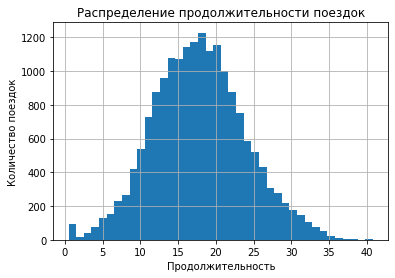

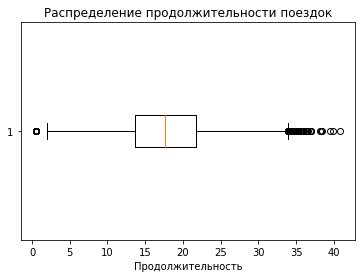

In [19]:
#Продолжительность поездок.
rides_df['duration'].plot(kind='hist', bins=40, grid=True, title='Распределение продолжительности поездок')
plt.xlabel('Продолжительность')
plt.ylabel('Количество поездок')
plt.show()

#Распределение времени
plt.boxplot(rides_df['duration'], vert=False)
plt.xlabel('Продолжительность')
plt.title('Распределение продолжительности поездок')
plt.show()

1. Возраст пользователей варьируется от 22 до 28, а медианный возраст пользователя сервиса 25 лет,
2. Пользователи совершают зачастую поездки с расстоянием в 2,6 до 3,8 километров.
3. Длительность поездок в интервале от 11 до 21 минуты.

# Шаг 4. Объединение данных

In [20]:
#Выводим размерность user_df.
display(users_df.shape[0])
#Выводим размерность rides_df.
display(rides_df.shape[0])
#Выводим размерность subscription_df.
display(subscriptions_df.shape[0])

1534

18068

2

In [21]:
#Объединение данных о пользователях, поездках и подписках.
df = pd.merge(users_df, rides_df, on='user_id', how='left')
df = pd.merge(df, subscriptions_df, how='left')

In [33]:
display(df.shape[0])

18068

In [22]:
#Проверка о размерности после объединения.
print('Датафрейм df:\n', df.head())
print('Размерность df:', df.shape[0])

Датафрейм df:

    user_id  name  age    city subscription_type     distance   duration  \

0        1  Кира   22  Тюмень             ultra  4409.919140  25.599769   

1        1  Кира   22  Тюмень             ultra  2617.592153  15.816871   

2        1  Кира   22  Тюмень             ultra   754.159807   6.232113   

3        1  Кира   22  Тюмень             ultra  2694.783254  18.511000   

4        1  Кира   22  Тюмень             ultra  4028.687306  26.265803   



        date  month  minute_price  start_ride_price  subscription_fee  

0 2021-01-01      1             6                 0               199  

1 2021-01-18      1             6                 0               199  

2 2021-04-20      4             6                 0               199  

3 2021-08-11      8             6                 0               199  

4 2021-08-28      8             6                 0               199  

Размерность df: 18068


In [23]:
#Добавляем столбец с пользователями c подпиской.
ultra_df = df[df['subscription_type'] == 'ultra']
#Проверим пропуски.
display(ultra_df.isna().sum())
#Выведем freed_df.
display(ultra_df)

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,24.671163,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.702563,15.892886,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.159348,14.389525,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.845501,15.839579,2021-10-17,10,6,0,199


In [24]:
#Добавляем столбец с пользователями c подпиской.
free_df = df[df['subscription_type'] == 'free']
#Проверим пропуски.
display(free_df.isna().sum())
#Выведем freed_df.
display(free_df)

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


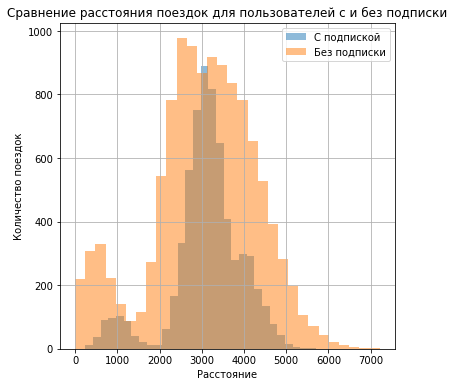

In [25]:
#Визуализация информации о расстоянии поездок для пользователей обеих категорий.
plt.figure(figsize=(6, 6))
plt.hist(ultra_df['distance'], bins=30, alpha=0.5, label='С подпиской')
plt.hist(free_df['distance'], bins=30, alpha=0.5, label='Без подписки')
plt.title('Сравнение расстояния поездок для пользователей с и без подписки')
plt.xlabel('Расстояние')
plt.ylabel('Количество поездок')
plt.grid()
plt.legend()
plt.show()

1. Тариф Free, которым пользуются пользователи используются для более длительных дистанции, чем на тарифе Ultra.
2. Тариф Free и тариф Ultra имеют приблизительно одинаковые медианные значения, а именно 3 км.
3. На тарифе Free пользователи чаще всего проезжают от 2,4 до 4 км, а на тарифе Ultra от 2,8 до 3,4 км.

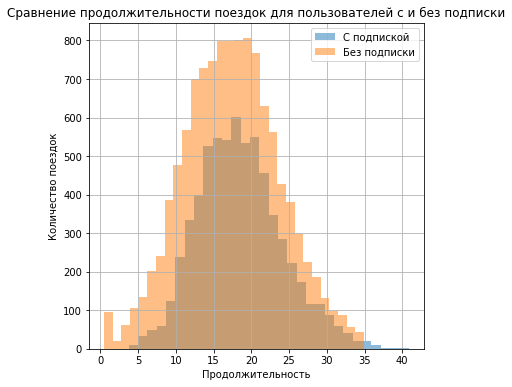

In [26]:
#Визуализация информации о продолжительности поездок для пользователей обеих категорий.
plt.figure(figsize=(6, 6))
plt.hist(ultra_df['duration'], bins=30, alpha=0.5, label='С подпиской')
plt.hist(free_df['duration'], bins=30, alpha=0.5, label='Без подписки')
plt.title('Сравнение продолжительности поездок для пользователей с и без подписки')
plt.xlabel('Продолжительность')
plt.ylabel('Количество поездок')
plt.grid()
plt.legend()
plt.show()

1. Тариф Free пользуется большим спросом поездок, чем на тарифе Ultra.
2. Тариф Free и тариф Ultra имеют "почти" одинаковые медианы, а именно 17,3 и 18,1.
3. Тариф Free используют от 12 до 23 минут, а Ultra от 15 до 21 минуты.

# Шаг 5. Подсчёт выручки

**1. Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.**

In [27]:
aggregated_df = df.groupby(['user_id', 'month']).agg({'distance': 'sum', 'user_id': 'count', 'duration': 'sum'})
aggregated_df.columns = ['distance_total', 'rides_total', 'duration_total']
aggregated_df = aggregated_df.reset_index()
display(aggregated_df)

,user_id,month,distance_total,rides_total,duration_total
0,1,1,7027.511294,2,41.416640
1,1,4,754.159807,1,6.232113
2,1,8,6723.470560,2,44.776802
3,1,10,5809.911100,2,31.578017
4,1,11,7003.499363,3,53.397424
...,...,...,...,...,...
11326,1534,6,3409.468534,2,24.812678
11327,1534,8,7622.453034,2,47.205960
11328,1534,9,4928.173852,1,22.560373
11329,1534,11,13350.015305,4,76.342174


In [28]:
#Проверка на пропуски aggregated_df.
print('Количество пропусков в aggregated_df:\n', aggregated_df.isna().sum())

Количество пропусков в aggregated_df:

 user_id           0

month             0

distance_total    0

rides_total       0

duration_total    0

dtype: int64


**2. В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратитесь к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа: например, значения 25.3, 25.5 и 26.0 должны быть преобразованы к 26.**

In [29]:
#Добавляем столбец с типом подписки.
subscription = df.set_index('user_id')['subscription_type'].to_dict()
aggregated_df['subscription_type'] = aggregated_df['user_id'].map(subscription)
#Стоимость одной минуты поездки для пользователей без подписки.
minute_for_free = 8
#Стоимость старта поездки для пользователей без подписки.
start_for_free = 50
#Абонентская плата для ultra.
subs_for_ultra = 199
#Стоимость одной минуты поездки для подписчиков ultra.
minute_for_ultra = 6

#Функция для округления продолжительности поездки.
def round_duration(duration):
    return np.ceil(duration)

#Функция для вычисления помесячной выручки.
def calculate_revenue_for_month(x):
    rides_total = x['rides_total']
    duration_total = x['duration_total']
    
    rounded_duration = round_duration(duration_total)
    
    if x['subscription_type'] == 'free':
        revenue = (start_for_free * rides_total) + (minute_for_free * rounded_duration)
    elif x['subscription_type'] == 'ultra':
        revenue = (minute_for_ultra * rounded_duration) + subs_for_ultra
    else:
        revenue = 0.0
    
    return revenue

#Добавление столбца с помесячной выручкой.
aggregated_df['monthly_revenue'] = aggregated_df.apply(calculate_revenue_for_month, axis=1)

#Вывод aggregated_df с помесячной выручкой.
print("Датафрейм с помесячной выручкой:")
display(aggregated_df)

#Вывод средней помесячной выручки для ultra и free.
otchet = aggregated_df.groupby('subscription_type')['monthly_revenue'].mean()
print(f'Средняя помесячная выручка для free и ultra: \n{otchet}')

Датафрейм с помесячной выручкой:


,user_id,month,distance_total,rides_total,duration_total,subscription_type,monthly_revenue
0,1,1,7027.511294,2,41.416640,ultra,451.0
1,1,4,754.159807,1,6.232113,ultra,241.0
2,1,8,6723.470560,2,44.776802,ultra,469.0
3,1,10,5809.911100,2,31.578017,ultra,391.0
4,1,11,7003.499363,3,53.397424,ultra,523.0
...,...,...,...,...,...,...,...
11326,1534,6,3409.468534,2,24.812678,free,300.0
11327,1534,8,7622.453034,2,47.205960,free,484.0
11328,1534,9,4928.173852,1,22.560373,free,234.0
11329,1534,11,13350.015305,4,76.342174,free,816.0


Средняя помесячная выручка для free и ultra: 

subscription_type

free     325.842895

ultra    361.481800

Name: monthly_revenue, dtype: float64


# Шаг 6. Проверка гипотез

**1. Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.**

**H0**: Пользователи с подпиской и без подписки не различаются по продолжительности поездок.

**H1**: Пользователи с подпиской тратят больше времени на поездки.

In [30]:
test_ultra = ultra_df['duration']
test_free = free_df['duration']

alpha = 0.05

results = st.ttest_ind(test_ultra, test_free, alternative='greater')
print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print("Подтверждаем гипотезу: пользователи с подпиской тратят больше времени на поездки")
else:
    print("Отвергаем гипотезу: пользователи с подпиской и без подписки не различаются по продолжительности поездок")

p-value: 1.2804098316645618e-34

Подтверждаем гипотезу: пользователи с подпиской тратят больше времени на поездки


**2. Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.**

**H0**: Расстояние, которое пользователи проезжают с подпиской за одну поездку, превышает 3130 метров.

**H1**: Расстояние, которое пользователи проезжают с подпиской за одну поездку,  превышает 3130 метров.

In [31]:
distance_for_ultra = ultra_df['distance']

value = 3130
alpha = 0.05

results = st.ttest_1samp(distance_for_ultra, value, alternative='greater')
print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print("Подтверждаем гипотезу: расстояние, которое пользователи проезжают с подпиской за одну поездку, не превышает 3130 метров")
else:
    print("Отвергаем гипотезу: расстояние, которое пользователи проезжают с подпиской за одну поездку, превышает 3130 метров")

p-value: 0.9195368847849785

Отвергаем гипотезу: расстояние, которое пользователи проезжают с подпиской за одну поездку, превышает 3130 метров


**3. Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.**

**H0**: Ежемесячная выручка от пользователей с подпиской и без подписки не различается.

**H1**: Ежемесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки.

In [32]:
user_with_ultra = aggregated_df[aggregated_df['subscription_type'] == 'ultra']['monthly_revenue']
user_without_subs = aggregated_df[aggregated_df['subscription_type'] == 'free']['monthly_revenue']

alpha = 0.5

results = st.ttest_ind(user_with_ultra, user_without_subs, alternative='greater')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print("Подтверждаем гипотезу: ежемесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки")
else:
    print("Отвергаем гипотезу: ежемесячная выручка от пользователей с подпиской и без подписки не различается")

p-value: 2.8130926188487286e-35

Подтверждаем гипотезу: ежемесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки


**4. Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?**

**Необходим тест с проверкой гипотезы о равенстве средних для зависимых (парных) выборок с использованием метода scipy.stats.ttest_rel().**
<p> Нулевая гипотеза H0: Среднее количество обращений в техподдержку до обновления серверов равно среднему количеству обращений после обновления.
<p> Альтернативная гипотеза H1:  Среднее количество обращений в техподдержку до обновления серверов отличается от среднего количества обращений после обновления.

# Общий вывод

**Нам был передано 3 датасета для анализа данных и проверки гипотез по вопросам бизнеса, касаемо некоторых пользователей сервиса аренды самокатов GoFast из нескольких городов.**
<p>На удивление, многие данные были предоставлены, а количество дубликатов было мизерное. К счастью, все дубликаты были устранены. Изменили тип данных только у одного столбца. Был добавлен стобец с месячной выручкой. По итогу вышло, что данные содержат в себе информацию о 18068 поездках и 1534 пользователях.

**Исследование выявило, что:**
1. Средний медианный возраст пользователей 25 лет.
2. Протяженность, которую проезжают пользователи составляют в интервале от 2,8 до 3,5 километров.
3. Среднее время, которое затрачивают на поездки составляет от 12 до 21 минуты.
4. Большая часть пользователей из Пятигорска, а наименьшая из Москвы.
5. Доля пользователей с подпиской Ultra составляет 54,4%, без подписки Free 45,6%.

**Были проведены гипотезы и выяснилось, что:**
1. Гипотеза 1: пользователи с подпиской тратят больше времени на поездки?
<p> Гипотеза подтверждена: пользователи с подпиской тратят больше времени на поездки.
<p>
2. Гипотеза 2: расстояние, которое пользователи проезжают с подпиской за одну поездку, не превышает 3130 метров?
<p>Отвергаем гипотезу: расстояние, которое пользователи проезжают с подпиской за одну поездку, превышает 3130 метров.
<p>
3. Гипотеза 3: ежемесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки?
<p>Гипотеза подтверждена: ежемесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки.

**Вывод:** Пользователи, которые приобретали подписку "Ultra" являлись самыми выгодными для сервиса GoFast. Учитывая, что пользователи с подпиской тратят больше времени на поездки и приносят больше выручки, стоит активно продвигать подписки среди пользователей. Предоставляйте им дополнительные преимущества, такие как скидки на продолжительные поездки, приоритетное обслуживание и доступ к эксклюзивным функциям или маршрутам.